In [1]:
import os
import numpy as np
import tqdm
from tqdm.notebook import tqdm_notebook
import pandas as pd
import datetime

In [2]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score
import sklearn

In [3]:
tqdm_notebook.pandas()

# Train

In [4]:
training_folds = [1,2,3,4,6]
features = ['mfcc', 'spectogram', 'mel_spectogram', 'chroma_stft', 'chroma_cqt', 'chroma_cens', 'spectral_contrast', 'tonnetz', 'rms', 'spectral_centroid', 'spectral_bandwidth', 'spectral_flatness', 'poly_features', 'zero_crossing_rate', 'spectral_rolloff']

In [5]:
n_features = 0
feature_matrices = []
for feature in tqdm_notebook(features, desc = "Features loop"):
    feature_matrix = np.load(f'/Users/lizzy/Desktop/Universita/cesab/project/all_data/train_data/{feature}_matrix.npy')
    n_observations = feature_matrix.shape[0]
    if len(feature_matrix.shape) > 2:
        n_features = n_features + feature_matrix.shape[1]
    else:
        n_features = n_features + 1
        n_samples = feature_matrix.shape[1]
    feature_matrices.append(feature_matrix)

Features loop:   0%|          | 0/15 [00:00<?, ?it/s]

In [6]:
X_train = np.ndarray(shape = (n_observations, n_features))

In [7]:
for feature_matrix in tqdm_notebook(feature_matrices, desc = "Features loop"):
    for i in range(X_train.shape[0]):
        feature_count = 0
        if len(feature_matrix.shape) > 2:
            for j in range(feature_matrix.shape[1]):
                X_train[i, feature_count] = np.mean(feature_matrix[i, j])
                feature_count = feature_count + 1
        else:
            X_train[i, feature_count] = np.mean(feature_matrix[i])
            feature_count = feature_count + 1

Features loop:   0%|          | 0/15 [00:00<?, ?it/s]

In [23]:
y_train = np.load('/Users/lizzy/Desktop/Universita/cesab/project/all_data/train_data/training_class.json.npy')

# Neural Network

In [9]:
X_train.shape

(4499, 1250)

In [10]:
histories = []
for i in range(5):
    if i != 4:
        start = i * 1000
        stop = (i+1)*1000
        val_indices = range(start, stop)
        train_indices = [x for x in range(X_train.shape[0]) if x not in val_indices]
        X_val = X_train[val_indices]
        y_val = y_train[val_indices]
        X_train_reduced = X_train[train_indices]
        y_train_reduced = y_train[train_indices]
    else:
        X_val = X_train[4000:]
        y_val = y_train[4000:]
        X_train_reduced = X_train[:4000]
        y_train_reduced = y_train[:4000]
        
    #model    
    model = Sequential()
    model.add(layers.InputLayer(input_shape = (X_train.shape[1],)))
    for l in range(2):
        model.add(layers.Dense(30, activation='relu'))
        model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    #print(model.summary())

    history = model.fit(X_train_reduced,
                        y_train_reduced,
                        epochs=200,
                        batch_size = 10, 
                        validation_data = (X_val, y_val),
                        callbacks = [])
    histories.append((i, history, model))

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
  1/350 [..............................] - ETA: 55s - loss: 2.3356 - accuracy: 0.0000e+00

2021-08-31 08:11:18.534706: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-08-31 08:11:18.534867: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


239/350 [===================>..........] - ETA: 0s - loss: 2.2066 - accuracy: 0.1923   WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x476718700> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
350/350 [==============================] - 1s 1ms/step - loss: 2.1689 - accuracy: 0.2075 - val_loss: 2.1138 - val_accuracy: 0.2000
Ep

350/350 [==============================] - 0s 505us/step - loss: 0.2437 - accuracy: 0.9103 - val_loss: 7.4678 - val_accuracy: 0.2950
Epoch 107/200
350/350 [==============================] - 0s 474us/step - loss: 0.3047 - accuracy: 0.8886 - val_loss: 7.3293 - val_accuracy: 0.3030
Epoch 108/200
350/350 [==============================] - 0s 475us/step - loss: 0.2680 - accuracy: 0.8969 - val_loss: 7.6453 - val_accuracy: 0.3330
Epoch 109/200
350/350 [==============================] - 0s 484us/step - loss: 0.2849 - accuracy: 0.8871 - val_loss: 6.9909 - val_accuracy: 0.3410
Epoch 110/200
350/350 [==============================] - 0s 501us/step - loss: 0.2395 - accuracy: 0.9122 - val_loss: 7.3644 - val_accuracy: 0.3200
Epoch 111/200
350/350 [==============================] - 0s 504us/step - loss: 0.2364 - accuracy: 0.9120 - val_loss: 7.1814 - val_accuracy: 0.3090
Epoch 112/200
350/350 [==============================] - 0s 504us/step - loss: 0.2787 - accuracy: 0.8948 - val_loss: 7.2426 - val_ac

Epoch 162/200
350/350 [==============================] - 0s 475us/step - loss: 0.2298 - accuracy: 0.9130 - val_loss: 8.2660 - val_accuracy: 0.3350
Epoch 163/200
350/350 [==============================] - 0s 475us/step - loss: 0.1857 - accuracy: 0.9263 - val_loss: 8.8683 - val_accuracy: 0.3350
Epoch 164/200
350/350 [==============================] - 0s 471us/step - loss: 0.2774 - accuracy: 0.8972 - val_loss: 9.3394 - val_accuracy: 0.2970
Epoch 165/200
350/350 [==============================] - 0s 472us/step - loss: 0.3048 - accuracy: 0.8955 - val_loss: 8.5688 - val_accuracy: 0.3170
Epoch 166/200
350/350 [==============================] - 0s 464us/step - loss: 0.1574 - accuracy: 0.9436 - val_loss: 8.9019 - val_accuracy: 0.3300
Epoch 167/200
350/350 [==============================] - 0s 467us/step - loss: 0.2484 - accuracy: 0.9110 - val_loss: 8.9280 - val_accuracy: 0.3490
Epoch 168/200
350/350 [==============================] - 0s 501us/step - loss: 0.2298 - accuracy: 0.9108 - val_loss: 8

Epoch 5/200
350/350 [==============================] - 0s 525us/step - loss: 1.0307 - accuracy: 0.6198 - val_loss: 2.4295 - val_accuracy: 0.3260
Epoch 6/200
350/350 [==============================] - 0s 509us/step - loss: 0.9710 - accuracy: 0.6409 - val_loss: 2.5881 - val_accuracy: 0.3480
Epoch 7/200
350/350 [==============================] - 0s 496us/step - loss: 0.9805 - accuracy: 0.6462 - val_loss: 2.7599 - val_accuracy: 0.3270
Epoch 8/200
350/350 [==============================] - 0s 485us/step - loss: 0.8723 - accuracy: 0.6752 - val_loss: 2.6808 - val_accuracy: 0.3620
Epoch 9/200
350/350 [==============================] - 0s 522us/step - loss: 0.8515 - accuracy: 0.6844 - val_loss: 2.8476 - val_accuracy: 0.3370
Epoch 10/200
350/350 [==============================] - 0s 514us/step - loss: 0.7953 - accuracy: 0.7119 - val_loss: 2.9144 - val_accuracy: 0.3190
Epoch 11/200
350/350 [==============================] - 0s 489us/step - loss: 0.7877 - accuracy: 0.7128 - val_loss: 3.0384 - val_

350/350 [==============================] - 0s 486us/step - loss: 0.2004 - accuracy: 0.9260 - val_loss: 7.8932 - val_accuracy: 0.4280
Epoch 118/200
350/350 [==============================] - 0s 475us/step - loss: 0.2254 - accuracy: 0.9139 - val_loss: 8.1350 - val_accuracy: 0.3810
Epoch 119/200
350/350 [==============================] - 0s 485us/step - loss: 0.1962 - accuracy: 0.9245 - val_loss: 8.1774 - val_accuracy: 0.3480
Epoch 120/200
350/350 [==============================] - 0s 477us/step - loss: 0.3009 - accuracy: 0.8979 - val_loss: 8.7096 - val_accuracy: 0.3950
Epoch 121/200
350/350 [==============================] - 0s 479us/step - loss: 0.2096 - accuracy: 0.9229 - val_loss: 7.5204 - val_accuracy: 0.3940
Epoch 122/200
350/350 [==============================] - 0s 480us/step - loss: 0.3037 - accuracy: 0.8973 - val_loss: 8.2781 - val_accuracy: 0.3830
Epoch 123/200
350/350 [==============================] - 0s 487us/step - loss: 0.1872 - accuracy: 0.9281 - val_loss: 8.7092 - val_ac

Epoch 173/200
350/350 [==============================] - 0s 489us/step - loss: 0.2012 - accuracy: 0.9240 - val_loss: 10.0994 - val_accuracy: 0.4060
Epoch 174/200
350/350 [==============================] - 0s 487us/step - loss: 0.2423 - accuracy: 0.9099 - val_loss: 9.9385 - val_accuracy: 0.3610
Epoch 175/200
350/350 [==============================] - 0s 473us/step - loss: 0.2019 - accuracy: 0.9281 - val_loss: 9.4571 - val_accuracy: 0.3780
Epoch 176/200
350/350 [==============================] - 0s 477us/step - loss: 0.1622 - accuracy: 0.9364 - val_loss: 10.0277 - val_accuracy: 0.3710
Epoch 177/200
350/350 [==============================] - 0s 476us/step - loss: 0.2005 - accuracy: 0.9251 - val_loss: 10.1434 - val_accuracy: 0.3810
Epoch 178/200
350/350 [==============================] - 0s 475us/step - loss: 0.2047 - accuracy: 0.9290 - val_loss: 9.5303 - val_accuracy: 0.3750
Epoch 179/200
350/350 [==============================] - 0s 477us/step - loss: 0.1561 - accuracy: 0.9381 - val_loss

Epoch 16/200
350/350 [==============================] - 0s 471us/step - loss: 0.6218 - accuracy: 0.7655 - val_loss: 3.8772 - val_accuracy: 0.2940
Epoch 17/200
350/350 [==============================] - 0s 469us/step - loss: 0.6201 - accuracy: 0.7761 - val_loss: 4.3277 - val_accuracy: 0.3310
Epoch 18/200
350/350 [==============================] - 0s 471us/step - loss: 0.5973 - accuracy: 0.7691 - val_loss: 4.1593 - val_accuracy: 0.3280
Epoch 19/200
350/350 [==============================] - 0s 468us/step - loss: 0.6006 - accuracy: 0.7799 - val_loss: 4.1332 - val_accuracy: 0.3410
Epoch 20/200
350/350 [==============================] - 0s 471us/step - loss: 0.5752 - accuracy: 0.7838 - val_loss: 4.4922 - val_accuracy: 0.2950
Epoch 21/200
350/350 [==============================] - 0s 469us/step - loss: 0.5688 - accuracy: 0.7916 - val_loss: 4.9123 - val_accuracy: 0.3370
Epoch 22/200
350/350 [==============================] - 0s 474us/step - loss: 0.5429 - accuracy: 0.7936 - val_loss: 4.8473 -

350/350 [==============================] - 0s 471us/step - loss: 0.2313 - accuracy: 0.9101 - val_loss: 8.4845 - val_accuracy: 0.3460
Epoch 129/200
350/350 [==============================] - 0s 585us/step - loss: 0.2182 - accuracy: 0.9167 - val_loss: 8.2331 - val_accuracy: 0.3620
Epoch 130/200
350/350 [==============================] - 0s 598us/step - loss: 0.2216 - accuracy: 0.9104 - val_loss: 9.2493 - val_accuracy: 0.3540
Epoch 131/200
350/350 [==============================] - 0s 514us/step - loss: 0.2419 - accuracy: 0.9112 - val_loss: 8.4260 - val_accuracy: 0.3290
Epoch 132/200
350/350 [==============================] - 0s 514us/step - loss: 0.2518 - accuracy: 0.9025 - val_loss: 8.9888 - val_accuracy: 0.3360
Epoch 133/200
350/350 [==============================] - 0s 492us/step - loss: 0.2322 - accuracy: 0.9035 - val_loss: 9.5690 - val_accuracy: 0.3240
Epoch 134/200
350/350 [==============================] - 0s 475us/step - loss: 0.2416 - accuracy: 0.9126 - val_loss: 9.7316 - val_ac

Epoch 184/200
350/350 [==============================] - 0s 469us/step - loss: 0.2077 - accuracy: 0.9159 - val_loss: 8.0787 - val_accuracy: 0.3670
Epoch 185/200
350/350 [==============================] - 0s 463us/step - loss: 0.2376 - accuracy: 0.9083 - val_loss: 9.0177 - val_accuracy: 0.3620
Epoch 186/200
350/350 [==============================] - 0s 462us/step - loss: 0.1912 - accuracy: 0.9229 - val_loss: 9.8326 - val_accuracy: 0.3700
Epoch 187/200
350/350 [==============================] - 0s 463us/step - loss: 0.1635 - accuracy: 0.9331 - val_loss: 8.5801 - val_accuracy: 0.3440
Epoch 188/200
350/350 [==============================] - 0s 462us/step - loss: 0.2097 - accuracy: 0.9133 - val_loss: 9.2943 - val_accuracy: 0.3630
Epoch 189/200
350/350 [==============================] - 0s 462us/step - loss: 0.1519 - accuracy: 0.9442 - val_loss: 9.1456 - val_accuracy: 0.3750
Epoch 190/200
350/350 [==============================] - 0s 462us/step - loss: 0.2030 - accuracy: 0.9255 - val_loss: 9

Epoch 27/200
350/350 [==============================] - 0s 484us/step - loss: 0.4411 - accuracy: 0.8372 - val_loss: 4.4584 - val_accuracy: 0.3280
Epoch 28/200
350/350 [==============================] - 0s 473us/step - loss: 0.4689 - accuracy: 0.8350 - val_loss: 4.1877 - val_accuracy: 0.3620
Epoch 29/200
350/350 [==============================] - 0s 481us/step - loss: 0.4553 - accuracy: 0.8469 - val_loss: 4.4600 - val_accuracy: 0.3490
Epoch 30/200
350/350 [==============================] - 0s 496us/step - loss: 0.4099 - accuracy: 0.8509 - val_loss: 4.5304 - val_accuracy: 0.3300
Epoch 31/200
350/350 [==============================] - 0s 509us/step - loss: 0.4403 - accuracy: 0.8469 - val_loss: 4.6411 - val_accuracy: 0.3440
Epoch 32/200
350/350 [==============================] - 0s 495us/step - loss: 0.4311 - accuracy: 0.8450 - val_loss: 4.9700 - val_accuracy: 0.3250
Epoch 33/200
350/350 [==============================] - 0s 503us/step - loss: 0.4148 - accuracy: 0.8552 - val_loss: 4.4423 -

Epoch 139/200
350/350 [==============================] - 0s 500us/step - loss: 0.1777 - accuracy: 0.9327 - val_loss: 9.4097 - val_accuracy: 0.3880
Epoch 140/200
350/350 [==============================] - 0s 477us/step - loss: 0.1925 - accuracy: 0.9301 - val_loss: 9.0851 - val_accuracy: 0.3770
Epoch 141/200
350/350 [==============================] - 0s 468us/step - loss: 0.1732 - accuracy: 0.9412 - val_loss: 9.1143 - val_accuracy: 0.3350
Epoch 142/200
350/350 [==============================] - 0s 464us/step - loss: 0.2176 - accuracy: 0.9256 - val_loss: 9.3756 - val_accuracy: 0.3420
Epoch 143/200
350/350 [==============================] - 0s 469us/step - loss: 0.2361 - accuracy: 0.9172 - val_loss: 9.5736 - val_accuracy: 0.3430
Epoch 144/200
350/350 [==============================] - 0s 463us/step - loss: 0.2520 - accuracy: 0.9063 - val_loss: 9.4456 - val_accuracy: 0.3140
Epoch 145/200
350/350 [==============================] - 0s 463us/step - loss: 0.1983 - accuracy: 0.9394 - val_loss: 9

400/400 [==============================] - 0s 448us/step - loss: 0.4512 - accuracy: 0.8359 - val_loss: 3.8530 - val_accuracy: 0.4088
Epoch 38/200
400/400 [==============================] - 0s 447us/step - loss: 0.4396 - accuracy: 0.8382 - val_loss: 4.2574 - val_accuracy: 0.3587
Epoch 39/200
400/400 [==============================] - 0s 471us/step - loss: 0.4220 - accuracy: 0.8451 - val_loss: 3.8414 - val_accuracy: 0.3828
Epoch 40/200
400/400 [==============================] - 0s 456us/step - loss: 0.4106 - accuracy: 0.8500 - val_loss: 3.7353 - val_accuracy: 0.3667
Epoch 41/200
400/400 [==============================] - 0s 465us/step - loss: 0.3884 - accuracy: 0.8617 - val_loss: 3.8839 - val_accuracy: 0.4128
Epoch 42/200
400/400 [==============================] - 0s 445us/step - loss: 0.3923 - accuracy: 0.8637 - val_loss: 4.0082 - val_accuracy: 0.3888
Epoch 43/200
400/400 [==============================] - 0s 440us/step - loss: 0.3826 - accuracy: 0.8519 - val_loss: 4.2632 - val_accuracy

Epoch 149/200
400/400 [==============================] - 0s 425us/step - loss: 0.2049 - accuracy: 0.9294 - val_loss: 6.7780 - val_accuracy: 0.3848
Epoch 150/200
400/400 [==============================] - 0s 426us/step - loss: 0.2137 - accuracy: 0.9277 - val_loss: 6.8931 - val_accuracy: 0.3567
Epoch 151/200
400/400 [==============================] - 0s 424us/step - loss: 0.2436 - accuracy: 0.9087 - val_loss: 6.2085 - val_accuracy: 0.3908
Epoch 152/200
400/400 [==============================] - 0s 429us/step - loss: 0.1947 - accuracy: 0.9313 - val_loss: 6.0689 - val_accuracy: 0.4108
Epoch 153/200
400/400 [==============================] - 0s 424us/step - loss: 0.2180 - accuracy: 0.9248 - val_loss: 5.6314 - val_accuracy: 0.4248
Epoch 154/200
400/400 [==============================] - 0s 425us/step - loss: 0.2254 - accuracy: 0.9138 - val_loss: 5.7305 - val_accuracy: 0.4088
Epoch 155/200
400/400 [==============================] - 0s 421us/step - loss: 0.2254 - accuracy: 0.9197 - val_loss: 6

In [12]:
summary_history = dict({'loss':[], 'accuracy':[], 'val_loss':[], 'val_accuracy':[]})
for h in histories:
    summary_history['loss'].append(h[1].history['loss'][-1])
    summary_history['accuracy'].append(h[1].history['accuracy'][-1])
    summary_history['val_loss'].append(h[1].history['val_loss'][-1]) 
    summary_history['val_accuracy'].append(h[1].history['val_accuracy'][-1])
summary_history = pd.DataFrame(summary_history)
summary_history

,loss,accuracy,val_loss,val_accuracy
0,0.213996,0.921692,9.364890,0.322000
1,0.227911,0.919977,9.436511,0.367000
2,0.180692,0.931409,9.335896,0.365000
3,0.152767,0.946842,10.247957,0.381000
4,0.166004,0.935750,7.352659,0.422846


In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

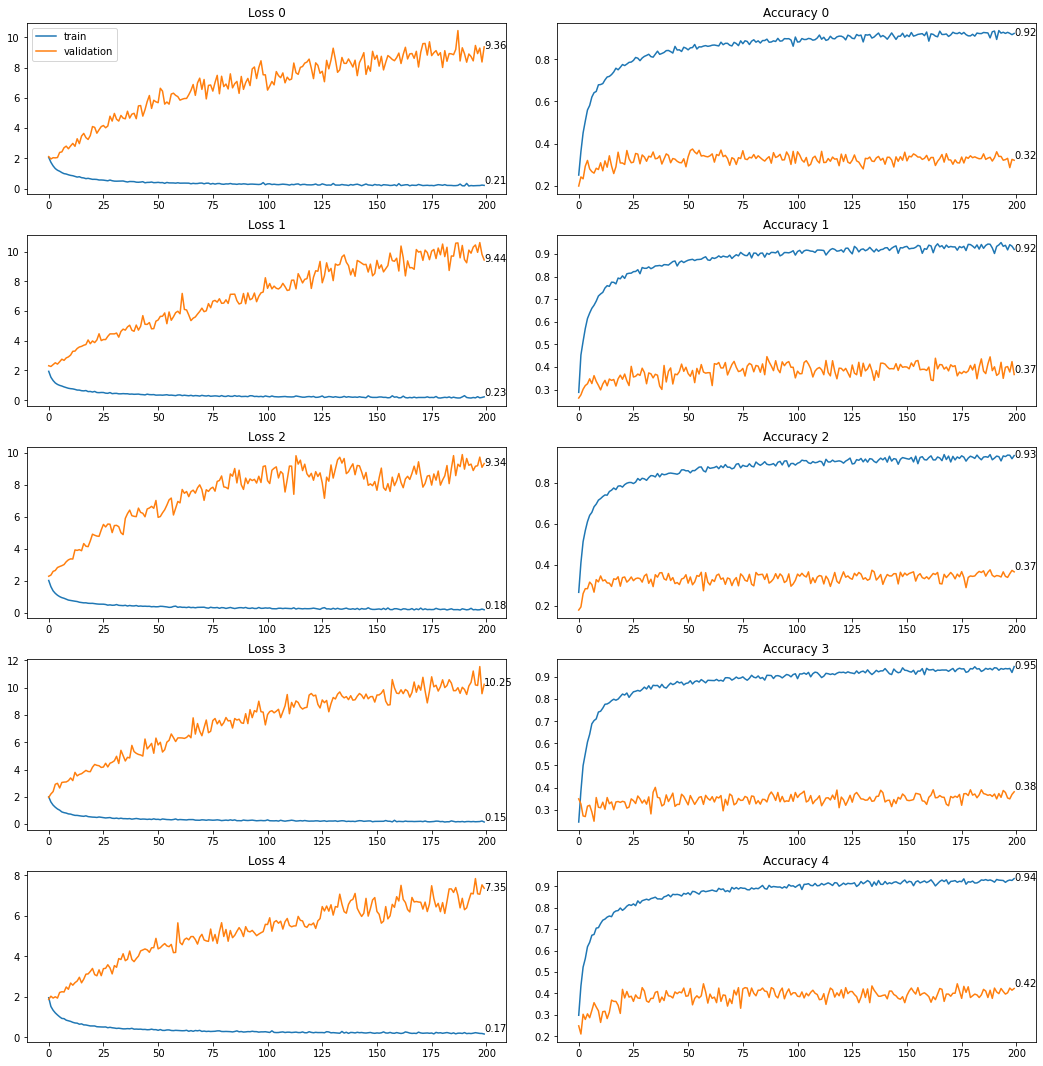

In [14]:
fig, axs = plt.subplots(5, 2,figsize=(15,15))
fig.tight_layout(pad=2.0)
for h, i in zip(histories, range(len(histories))):
    axs[i, 0].plot(h[1].history['loss'])
    axs[i, 0].plot(h[1].history['val_loss'])
    axs[i, 0].set_title(f'Loss {i}')
    axs[i, 0].annotate(str(round(h[1].history['loss'][-1], 2)),
                       xy = (199, h[1].history['loss'][-1]),
                       xytext = (199, h[1].history['loss'][-1] + 0.1))
    axs[i, 0].annotate(str(round(h[1].history['val_loss'][-1], 2)),
                       xy = (199, h[1].history['val_loss'][-1]),
                       xytext = (199, h[1].history['val_loss'][-1] - 0.1))
    axs[0, 0].legend(['train', 'validation'], loc='upper left')
    axs[i, 1].plot(h[1].history['accuracy'])
    axs[i, 1].plot(h[1].history['val_accuracy'])
    axs[i, 1].set_title(f'Accuracy {i}')
    axs[i, 1].annotate(str(round(h[1].history['accuracy'][-1], 2)),
                       xy = (199, h[1].history['accuracy'][-1]),
                       xytext = (199, h[1].history['accuracy'][-1] - 0.01))
    axs[i, 1].annotate(str(round(h[1].history['val_accuracy'][-1], 2)),
                       xy = (199, h[1].history['val_accuracy'][-1]),
                       xytext = (199, h[1].history['val_accuracy'][-1] + 0.01))

In [15]:
fig.savefig('mean_data_val.pdf')
summary_history.to_csv('summary_history_mean_data_val.csv')

In [16]:
#best model: highest validation accuracy
best_model_index = summary_history['val_accuracy'].idxmax()
best_model = histories[best_model_index][2]
best_model.save('mean_data_val')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert

FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: mean_data_val/assets


/Users/lizzy/miniforge3/envs/tf_m1/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
2021-08-31 08:14:13.919775: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/Users/lizzy/miniforge3/envs/tf_m1/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


# Train without validation

In [25]:
model = Sequential()
model.add(layers.InputLayer(input_shape = (X_train.shape[1],)))
for l in range(2):
    model.add(layers.Dense(30, activation='relu'))
    model.add(layers.Dense(15, activation='relu'))
    if l%2 == 0 and l != 0:
        model.add(layers.Dropout(0.1))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#print(model.summary())

history = model.fit(X_train,
                    y_train,
                    epochs=200,
                    batch_size = 10,
                    callbacks = [])

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
450/450 [==============================] - 0s 403us/step - loss: 2.0996 - accuracy: 0.2265
Epoch 2/200
450/450 [==============================] - 0s 399us/step - loss: 1.6756 - accuracy: 0.3909
Epoch 3/200
450/450 [==============================] - 0s 427us/step - loss: 1.4228 - accuracy: 0.4802
Epoch 4/200
450/450 [==============================] - 0s

450/450 [==============================] - 0s 385us/step - loss: 0.3399 - accuracy: 0.8778
Epoch 72/200
450/450 [==============================] - 0s 378us/step - loss: 0.3425 - accuracy: 0.8758
Epoch 73/200
450/450 [==============================] - 0s 419us/step - loss: 0.3057 - accuracy: 0.8758
Epoch 74/200
450/450 [==============================] - 0s 409us/step - loss: 0.3303 - accuracy: 0.8767
Epoch 75/200
450/450 [==============================] - 0s 410us/step - loss: 0.3171 - accuracy: 0.8851
Epoch 76/200
450/450 [==============================] - 0s 386us/step - loss: 0.3301 - accuracy: 0.8805
Epoch 77/200
450/450 [==============================] - 0s 380us/step - loss: 0.3849 - accuracy: 0.8626
Epoch 78/200
450/450 [==============================] - 0s 378us/step - loss: 0.2834 - accuracy: 0.8942
Epoch 79/200
450/450 [==============================] - 0s 378us/step - loss: 0.3033 - accuracy: 0.8927
Epoch 80/200
450/450 [==============================] - 0s 379us/step - loss:

In [27]:
summary_history = dict({'loss':[], 'accuracy':[]})
summary_history['loss'].append(history.history['loss'][-1])
summary_history['accuracy'].append(history.history['accuracy'][-1])
summary_history = pd.DataFrame(summary_history)
summary_history

,loss,accuracy
0,0.233421,0.919538


Text(199, 0.9095376634597778, '0.92')

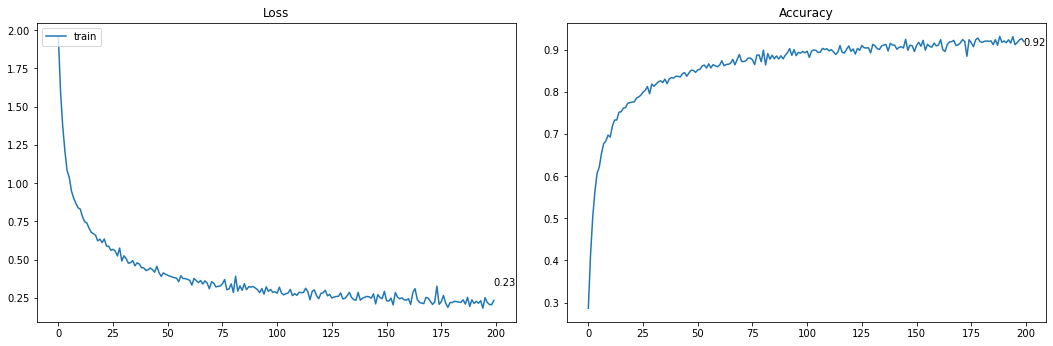

In [29]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))
fig.tight_layout(pad=2.0)
axs[0].plot(history.history['loss'])
axs[0].set_title(f'Loss')
axs[0].annotate(str(round(history.history['loss'][-1], 2)),
                   xy = (199, history.history['loss'][-1]),
                   xytext = (199, history.history['loss'][-1] + 0.1))
axs[0].legend(['train'], loc='upper left')
axs[1].plot(history.history['accuracy'])
axs[1].set_title(f'Accuracy')
axs[1].annotate(str(round(history.history['accuracy'][-1], 2)),
                   xy = (199, history.history['accuracy'][-1]),
                   xytext = (199, history.history['accuracy'][-1] - 0.01))

In [30]:
fig.savefig('mean_data.pdf')
summary_history.to_csv('summary_history_mean_data.csv')

In [31]:
model.save('mean_data')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert

FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: mean_data/assets


/Users/lizzy/miniforge3/envs/tf_m1/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/Users/lizzy/miniforge3/envs/tf_m1/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


# Test

In [4]:
test_folds = [5,7,8,9,10]
features = ['mfcc', 'spectogram', 'mel_spectogram', 'chroma_stft', 'chroma_cqt', 'chroma_cens', 'spectral_contrast', 'tonnetz', 'rms', 'spectral_centroid', 'spectral_bandwidth', 'spectral_flatness', 'poly_features', 'zero_crossing_rate', 'spectral_rolloff']

In [5]:
n_features = 0
feature_matrices = []
for feature in tqdm_notebook(features, desc = "Features loop"):
    feature_matrix = np.load(f'/Users/lizzy/Desktop/Universita/cesab/project/all_data/test_data/{feature}_matrix.npy')
    n_observations = feature_matrix.shape[0]
    if len(feature_matrix.shape) > 2:
        n_features = n_features + feature_matrix.shape[1]
    else:
        n_features = n_features + 1
        n_samples = feature_matrix.shape[1]
    feature_matrices.append(feature_matrix)

Features loop:   0%|          | 0/15 [00:00<?, ?it/s]

In [6]:
X_test = np.ndarray(shape = (n_observations, n_features))

In [7]:
for feature_matrix in tqdm_notebook(feature_matrices, desc = "Features loop"):
    for i in range(X_test.shape[0]):
        feature_count = 0
        if len(feature_matrix.shape) > 2:
            for j in range(feature_matrix.shape[1]):
                X_test[i, feature_count] = np.mean(feature_matrix[i, j])
                feature_count = feature_count + 1
        else:
            X_test[i, feature_count] = np.mean(feature_matrix[i])
            feature_count = feature_count + 1

Features loop:   0%|          | 0/15 [00:00<?, ?it/s]

In [8]:
y_test = np.load('/Users/lizzy/Desktop/Universita/cesab/project/all_data/test_data/test_class.json.npy')

In [4]:
model =  tensorflow.keras.models.load_model("mean_data")

In [5]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 30)                37530     
_________________________________________________________________
dense_31 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_32 (Dense)             (None, 30)                480       
_________________________________________________________________
dense_33 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_34 (Dense)             (None, 10)                160       
Total params: 39,100
Trainable params: 39,100
Non-trainable params: 0
_________________________________________________________________


In [10]:
evaluation = model.evaluate(X_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
133/133 [==============================] - 0s 299us/step - loss: 9.4395 - accuracy: 0.3957


2021-08-31 08:25:33.110301: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-08-31 08:25:33.110435: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


In [11]:
print(f'Loss: {evaluation[0]}, accuracy:{evaluation[1]}')

Loss: 9.439521789550781, accuracy:0.39570045471191406


In [12]:
y_pred = model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [18]:
matrix = sklearn.metrics.confusion_matrix(y_test, y_pred.argmax(axis=1))

In [25]:
labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music']

In [33]:
scores = dict({'Class':[], 'Precision':[], 'Recall':[]})
for cl in range(10):
    precision = matrix[cl,cl] / sum(matrix[:,cl]) #tp/(tp+fp)
    recall = matrix[cl,cl] / sum(matrix[cl,:]) #tp/(tp+fn)
    scores['Class'].append(labels[cl])
    scores['Precision'].append(precision)
    scores['Recall'].append(recall)
scores = pd.DataFrame(scores)
scores

,Class,Precision,Recall
0,air_conditioner,0.344512,0.226000
1,car_horn,0.352941,0.162896
2,children_playing,0.478056,0.610000
3,dog_bark,0.419486,0.620000
4,drilling,0.289384,0.338000
5,engine_idling,0.326829,0.138716
6,gun_shot,0.589862,0.695652
7,jackhammer,0.322464,0.196903
8,siren,0.485646,0.516539
9,street_music,0.351240,0.510000


In [34]:
scores.to_csv('scores_mean_data.csv')